In [159]:
import data as datainterface
from generator import Sampler
import random
import timeit
import matplotlib.pyplot as plt 
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/vignesh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
from lm import Unigram, TrigramLinInter

In [170]:

path = "/Users/vignesh/Desktop/code/CSE256/cse256-nlp/A3_cse256_sp22/data/"
dnames = ["brown", "reuters", "gutenberg"]
datas = {}
models = {}
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts(path+"corpora.tar.gz", dname)
    datas[dname] = data
    # model = datainterface.learn_unigram(data)
    # models[dname] = model
    
    
    

-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
-----------------------
gutenberg
	dev: gutenberg/gutenberg.dev.txt
	train: gutenberg/gutenberg.train.txt
	test: gutenberg/gutenberg.test.txt
gutenberg  read. train: 68740 dev: 14729 test: 14826


In [162]:
def fit_model(train_data, model_type="unigram", lamda=[0.2, 0.3, 0.5], unk_cutoff=10.0):
    if model_type == "unigram":
        mod = Unigram()
        mod.fit_corpus(train_data)
        return mod
    else:
        mod = TrigramLinInter(unk_cutoff, lamda)
        mod.fit_corpus(train_data)
        return mod

In [163]:
def print_table(table, row_names, col_names, latex_file = None):
    row_format ="{:>15} " * (len(col_names) + 1)
    for row_name, row in zip(row_names, table):
        print(row_format.format(row_name, *row))

In [164]:
training_data_prop = [i * 0.1 for i in range(1, 11)]

dataset_test_results = {}

for dname in dnames:
    
    data = datas[dname]
    num_train = float(len(data.train))
    dataset_test_results[dname] = []
    for p in training_data_prop:
        training_data = data.train[:int(p * num_train)]
        mod = fit_model(training_data, "unigram")
        dataset_test_results[dname].append(mod.perplexity(data.test))
        # print("done:" + str(p) + " : on data:" + str(dname)) 
        

In [165]:
# 2.1: Analysis on In-Domain Text

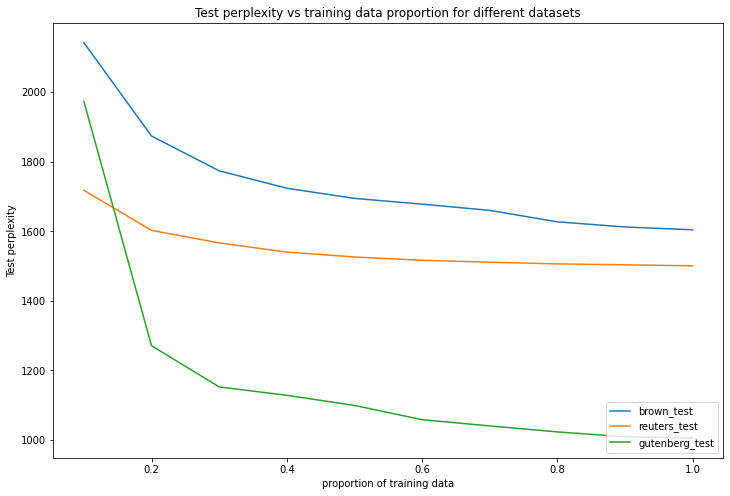

In [166]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["legend.loc"] = 'lower right'
plt.xlabel("proportion of training data")
plt.ylabel("Test perplexity")
plt.title("Test perplexity vs training data proportion for different datasets")
for dname in dnames:
    plt.plot(training_data_prop, dataset_test_results[dname],  label=dname + "_test")
    
plt.legend()
plt.show()



In [167]:

path = "/Users/vignesh/Desktop/code/CSE256/cse256-nlp/A3_cse256_sp22/data/"
dnames = ["brown", "reuters", "gutenberg"]
datas = []
models = []
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts(path+"corpora.tar.gz", dname)
    datas.append(data)
    model = datainterface.learn_unigram(data)
    models.append(model)

 # compute the perplexity of all pairs
n = len(dnames)

-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
vocab: 41746
train: 1513.8018008490042
dev  : 1589.3868225664532
test : 1604.198220472703
sample 1:  to an was thoughtfulness straightforward and to born professional apparently it you to out postcard said Irish is an of
sample 2:  at ring gathered
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
vocab: 36037
train: 1471.209708062019
dev  : 1479.0930760437175
test : 1500.6949333808543
sample 1:  employees Ivorian discontinued MENA inefficient pct negotiating Cheryl and if Government
sample 2:  to Honda stock stock put Minister in 14 Evans mln subsidiary problem prepared remains Commission APPLIANCES 161 repeat of LIVINGWELL they But acquired was FINANCIAL Net Prior statement the from 000 in our some li

In [168]:
# 2.2: Analysis on Out-of-Domain Text
perp_dev = np.zeros((n,n))
perp_test = np.zeros((n,n))
perp_train = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        perp_dev[i][j] = models[i].perplexity(datas[j].dev)
        perp_test[i][j] = models[i].perplexity(datas[j].test)
        perp_train[i][j] = models[i].perplexity(datas[j].train)

print("-------------------------------")
print("x train")
print_table(perp_train, dnames, dnames, "table-train.tex")
print("-------------------------------")
print("x dev")
print_table(perp_dev, dnames, dnames, "table-dev.tex")
print("-------------------------------")
print("x test")
print_table(perp_test, dnames, dnames, "table-test.tex")

        
        

-------------------------------
x train
          brown 1513.8018008490042 6780.820619448777 1758.0587913984943 
        reuters 3806.3945297300834 1471.209708062019 4882.79759269687 
      gutenberg 2616.568491217088 12420.127631089801 982.5718078017832 
-------------------------------
x dev
          brown 1589.3868225664532 6675.633454731267 1739.4134804762632 
        reuters 3808.869036502161 1479.0930760437175 4833.879064273983 
      gutenberg 2604.277920247012 12256.257783996705 991.5002070957079 
-------------------------------
x test
          brown 1604.198220472703 6736.601384677928 1762.0056984496032 
        reuters 3865.1555656505243 1500.6949333808543 4887.469712004549 
      gutenberg 2626.0504076848806 12392.539906457014 1005.7898465085633 


In [67]:
# 3.1 Hyper parameter tuning, model selection
lamda_vals = [[0.33, 0.33, 0.34], [0.1, 0.3, 0.6], [0.6, 0.3, 0.1], [0.3, 0.6, 0.1], [0.1, 0.6, 0.3], [0.9, 0.05, 0.05], [0.05, 0.9, 0.05], [0.05, 0.05, 0.9]]
unk_cutoffs = [1.0, 2.0, 5.0, 10.0, 15.0, 20.0]

In [70]:
# fix unknown find best lamda
train_perps = []
dev_perps = []
for dname in dnames:
    data = datas[dname]
    lis = []
    for l_val in lamda_vals:
        trigram_mod = fit_model(data.train, "trigram", lamda=l_val)
        trigram_train_perp = trigram_mod.perplexity(data.train)
        trigram_dev_perp = trigram_mod.perplexity(data.dev)
        lis.append(trigram_dev_perp)
        print("-------------------------------")
        print("dataset: " + str(dname) + "config:" + str(l_val) + " unk:" + str(10))
        print("trigram model train perplexity:" + str(trigram_train_perp))
        print("trigram model dev perplexity:" + str(trigram_dev_perp))
    dev_perps.append(lis)

-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:10
trigram model train perplexity:16.402500121202028
trigram model dev perplexity:592.5341510486352
-------------------------------
dataset: brownconfig:[0.1, 0.3, 0.6] unk:10
trigram model train perplexity:10.68801720521534
trigram model dev perplexity:1020.550526870237
-------------------------------
dataset: brownconfig:[0.6, 0.3, 0.1] unk:10
trigram model train perplexity:37.22278832237175
trigram model dev perplexity:524.5454261729528
-------------------------------
dataset: brownconfig:[0.3, 0.6, 0.1] unk:10
trigram model train perplexity:31.041104215944532
trigram model dev perplexity:638.825304252474
-------------------------------
dataset: brownconfig:[0.1, 0.6, 0.3] unk:10
trigram model train perplexity:16.22842031385369
trigram model dev perplexity:1008.0487124621783
-------------------------------
dataset: brownconfig:[0.9, 0.05, 0.05] unk:10
trigram model train perplexity:73.78399051369479
trigram 

In [73]:
# fix lamda find best unknown
lamda_fix = [0.33, 0.33, 0.34]
train_perps = []
dev_perps = []
for dname in dnames:
    data = datas[dname]
    lis = []
    for unk_val in unk_cutoffs:
        trigram_mod = fit_model(data.train, "trigram", unk_cutoff=unk_val, lamda=lamda_fix)
        trigram_train_perp = trigram_mod.perplexity(data.train)
        trigram_dev_perp = trigram_mod.perplexity(data.dev)
        lis.append(trigram_dev_perp)
        print("-------------------------------")
        print("dataset: " + str(dname) + "config:" + str(lamda_fix) + " unk:" + str(unk_val))
        print("trigram model train perplexity:" + str(trigram_train_perp))
        print("trigram model dev perplexity:" + str(trigram_dev_perp))
    dev_perps.append(lis)

-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:1.0
trigram model train perplexity:13.707279291881228
trigram model dev perplexity:942.1392042562276
-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:2.0
trigram model train perplexity:14.198946257079188
trigram model dev perplexity:856.8686211777374
-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:5.0
trigram model train perplexity:15.21438592925611
trigram model dev perplexity:722.7438271733171
-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:10.0
trigram model train perplexity:16.31692843092199
trigram model dev perplexity:604.0585126118135
-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:15.0
trigram model train perplexity:17.136424615191302
trigram model dev perplexity:527.8406680802468
-------------------------------
dataset: brownconfig:[0.33, 0.33, 0.34] unk:20.0
trigram model train perplexity:17.

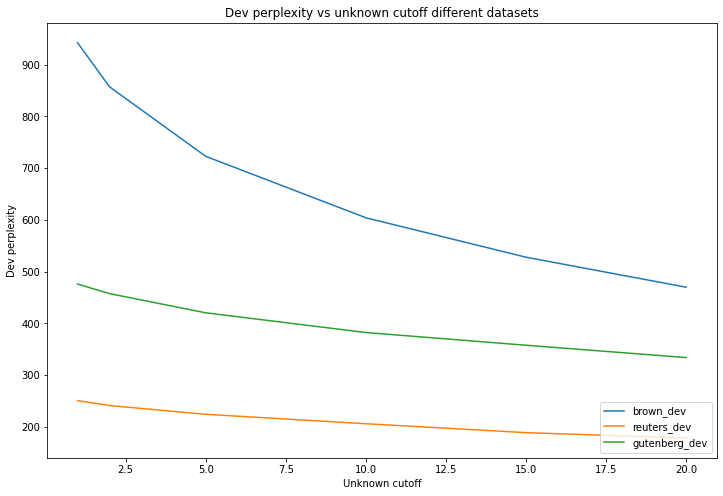

In [74]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["legend.loc"] = 'lower right'
plt.xlabel("Unknown cutoff")
plt.ylabel("Dev perplexity")
plt.title("Dev perplexity vs unknown cutoff different datasets")
    
plt.plot(unk_cutoffs, dev_perps[0],  label= "brown_dev")
plt.plot(unk_cutoffs, dev_perps[1],  label= "reuters_dev")
plt.plot(unk_cutoffs, dev_perps[2],  label= "gutenberg_dev")
    
plt.legend()
plt.show()



In [ ]:
# iterate over both unknown and lamda

In [ ]:
# fix lamda find best unknown
lamda_fix = [0.33, 0.33, 0.34]
train_perps = {}
dev_perps = {}
best_lam = {}
best_unk = {}
best_dev_perp = {}
for dname in dnames:
    data = datas[dname]
    train_perps[dname] = list()
    dev_perps[dname] = list()
    best_dev_perp[dname] = 99999.0
    for i in range(len(lamda_vals)):
        lam_val = lamda_vals[i]
        train_perps[dname].append(list())
        dev_perps[dname].append(list())
        for unk_val in unk_cutoffs:
            trigram_mod = fit_model(data.train, "trigram", unk_cutoff=unk_val, lamda=lam_val)
            trigram_train_perp = trigram_mod.perplexity(data.train)
            trigram_dev_perp = trigram_mod.perplexity(data.dev)
            train_perps[dname][i].append(trigram_train_perp)
            dev_perps[dname][i].append(trigram_dev_perp)
            if trigram_dev_perp < best_dev_perp[dname]:
                best_dev_perp[dname] = trigram_dev_perp
                best_unk[dname] = unk_val
                best_lam[dname] = lam_val
        print("done lamda val:" + str(lam_val))
    print("done dataset:" + str(dname))

In [171]:
# 3.1 performance compared with unigram, trigram base and trigram tuned model
for dname in dnames:
    data = datas[dname]
    unigram_mod = fit_model(data.train, "unigram")
    trigram_base_mod = fit_model(data.train, "trigram", unk_cutoff=1.0)
    trigram_mod = fit_model(data.train, "trigram", lamda=[0.33, 0.33, 0.34], unk_cutoff=10.0)
    
    unigram_test_perp = unigram_mod.perplexity(data.test)
    trigram_base_test_perp = trigram_base_mod.perplexity(data.test)
    trigram_test_perp = trigram_mod.perplexity(data.test)
    
    print("-------------------------------")
    print("dataset: " + str(dname))
    print("unigram model test perplexity:" + str(unigram_test_perp))
    print("trigram base model test perplexity:" + str(trigram_base_test_perp))
    print("trigram model test perplexity:" + str(trigram_test_perp))
        

-------------------------------
dataset: brown
unigram model test perplexity:1604.198220472703
trigram base model test perplexity:1210.6842272075187
trigram model test perplexity:611.6888647709991
-------------------------------
dataset: reuters
unigram model test perplexity:1500.6949333808543
trigram base model test perplexity:282.10650156456603
trigram model test perplexity:210.8594266343982
-------------------------------
dataset: gutenberg
unigram model test perplexity:1005.7898465085633
trigram base model test perplexity:562.3518432912914
trigram model test perplexity:384.62620354595657


In [172]:

models_trigram = []
datax = []
# Learn the models for each of the domains, and evaluate it
for dname in dnames:
    print("-----------------------")
    print(dname)
    data = datainterface.read_texts(path+"corpora.tar.gz", dname)
    datax.append(data)
    trigram_mod = fit_model(data.train, "trigram", lamda=[0.33, 0.33, 0.34], unk_cutoff=10.0)
    models_trigram.append(trigram_mod)

 # compute the perplexity of all pairs
n = len(dnames)





-----------------------
brown
	test: brown/brown.test.txt
	train: brown/brown.train.txt
	dev: brown/brown.dev.txt
brown  read. train: 39802 dev: 8437 test: 8533
-----------------------
reuters
	dev: reuters/reuters.dev.txt
	test: reuters/reuters.test.txt
	train: reuters/reuters.train.txt
reuters  read. train: 38169 dev: 8082 test: 8214
-----------------------
gutenberg
	dev: gutenberg/gutenberg.dev.txt
	train: gutenberg/gutenberg.train.txt
	test: gutenberg/gutenberg.test.txt
gutenberg  read. train: 68740 dev: 14729 test: 14826


In [173]:
# 3.3 Perform Out-of-Domain Text Analysis (Empirical)
perp_dev = np.zeros((n,n))
perp_test = np.zeros((n,n))
perp_train = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        perp_dev[i][j] = models_trigram[i].perplexity(datax[j].dev)
        perp_test[i][j] = models_trigram[i].perplexity(datax[j].test)
        perp_train[i][j] = models_trigram[i].perplexity(datax[j].train)

print("-------------------------------")
print("x train")
print_table(perp_train, dnames, dnames, "table-train.tex")
print("-------------------------------")
print("x dev")
print_table(perp_dev, dnames, dnames, "table-dev.tex")
print("-------------------------------")
print("x test")
print_table(perp_test, dnames, dnames, "table-test.tex")

        
        

-------------------------------
x train
          brown 16.380866093668267 674.7075324693437 631.1714015427783 
        reuters 711.1081257234279 15.020392567514627 813.8261008848925 
      gutenberg 663.7812730738079 754.7140100333555 22.17515598101132 
-------------------------------
x dev
          brown 602.9897488464196 672.9908223022493 630.9173993896928 
        reuters 697.3968215517455 206.3933182015374 817.9263002314341 
      gutenberg 659.3289250918897 764.3102846863359 380.7483411860289 
-------------------------------
x test
          brown 610.9846607406562 668.8383232040669 627.05738776343 
        reuters 715.1236679057894 210.26143206871777 809.0370294127825 
      gutenberg 664.5756642933558 752.589643681921 382.64635465517705 


In [ ]:
# 3.2 Show examples of sampled sentences

In [207]:
prefix1 = "At the moment ".split()
prefix2 = "The company reported".split()
prefix3 = "Debt of gratitude".split()


In [8]:
sampler_b = Sampler(models_trigram[0])
sampler_r = Sampler(models_trigram[1])
sampler_g = Sampler(models_trigram[2])

In [41]:
# generating sentences
' '.join(sampler_g.sample_sentence("Debt of gratitude".split()))

'Debt of gratitude to his companion looking so for is thing of it for earth No more flashing heads of called before the UNK waves pluck it of my UNK down among lands God fool the spiritual put up his coat'

In [44]:
a11 = "At the moment was postponed when UNK UNK UNK Oh my God lies on her adequate for double in formally enter into the in UNK of this essay to would in principle already unless green 10 center who missed between went to UNK and * Their heads were in the case "
a21 = "College teachers are industry Tuesday UNCHANGED BY UNK Sales dlrs"
a31 = "College teachers are answer they shall not the earth UNK to convince Lucy that no doubt but do"

In [45]:
a12 = "The company reported in his secret faith in the town next immediate weather UNK UNK Christian"
a22 = "The company reported net loss by 50 grams tonne was 42 cts vs which 14 cts Net 337 000 The banks raised dropped pct to 280 36 billion Avg shrs 74 387 billion stg However minister try to tonne Moore Medical pct owned by "
a32 = "The company reported kingdom of heaven"

In [46]:
a13 = "Debt of gratitude the industrial centers they get Julia had real"
a23 = "Debt of gratitude UNK role 30 crop prospects RATE UNK UNK of the Latin countries UNK by Fleet previously City said it 551 * fall in net"
a33 = "Debt of gratitude to his companion looking so for is thing of it for earth No more flashing heads of called before the UNK waves pluck it of my UNK down among lands God fool the spiritual put up his coat"

In [176]:
print(models_trigram[0].logprob_sentence(a11.split()))
print(models_trigram[0].logprob_sentence(a22.split()))
print(models_trigram[0].logprob_sentence(a33.split()))

-336.0561950289331
-535.9152085674397
-397.6448994222522


In [177]:
print(models_trigram[1].logprob_sentence(a11.split()))
print(models_trigram[1].logprob_sentence(a22.split()))
print(models_trigram[1].logprob_sentence(a33.split()))

-538.1218447632439
-331.2709208262046
-432.79728426470996


In [178]:
print(models_trigram[2].logprob_sentence(a11.split()))
print(models_trigram[2].logprob_sentence(a22.split()))
print(models_trigram[2].logprob_sentence(a33.split()))

-470.08513346817637
-467.5528915882247
-342.3794879448932


In [ ]:
# 3.4: Perform Out-of-Domain Text Analysis (Qualitative)

In [63]:
brown_vocab = models_trigram[0].ngram_models[0]
reuters_vocab = models_trigram[1].ngram_models[0]
gutenberg_vocab = models_trigram[2].ngram_models[0]

In [64]:
r_c = 0
g_c = 0
for k in brown_vocab:
    if k in reuters_vocab:
        r_c +=1
    if k in gutenberg_vocab:
        g_c += 1
print("brown words in reuters:", r_c)
print("brown words in gutenberg:", g_c)

brown words in reuters: 6790
brown words in gutenberg: 9000


In [65]:
b_c = 0
g_c = 0
for k in reuters_vocab:
    if k in brown_vocab:
        b_c +=1
    if k in gutenberg_vocab:
        g_c += 1
print("reuters words in brown:", b_c)
print("reuters words in gutenberg:", g_c)

reuters words in brown: 6790
reuters words in gutenberg: 5314


In [66]:
b_c = 0
r_c = 0
for k in gutenberg_vocab:
    if k in brown_vocab:
        b_c +=1
    if k in reuters_vocab:
        r_c += 1
print("gutenberg words in brown:", b_c)
print("gutenberg words in reuters:", r_c)

gutenberg words in brown: 9000
gutenberg words in reuters: 5314


In [175]:
# 4: Adaptation

In [149]:
nbrown = len(datas[0].train)
nreut = len(datas[1].train)
nguten = len(datas[2].train)
proportion = 0.3

sample_brown = random.sample(datas[0].train, int(proportion * nbrown))
sample_reuters = random.sample(datas[1].train, int(proportion * nreut))
sample_gutenberg = random.sample(datas[2].train, int(proportion * nguten))

In [150]:
models_trigram[2].fit_corpus(sample_reuters)

In [155]:
models_trigram[2].perplexity(datas[1].dev)

326.62171614904605